In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

sigmoid公式
$$z(x) = wx+b$$
$$S(x) = \frac{1}{1 + e^{-z(x)}}$$

In [39]:
def sigmoid(X,w,b):#向量都是行向量,X的维度(n,m)，n-特征数，m-样本数
    z = np.dot(w,X)+b 
    return 1/(1+np.exp(-z))

目标函数
$$J(\theta) = -\frac{ 1 }{ m }[\sum_{ i=1 }^{ m } ({y^{(i)} \log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)})})]$$
m：训练样本的个数；

hθ(x)：用参数θ和x预测出来的y值；

y：原训练样本中的y值，也就是标准答案

上角标(i)：第i个样本

In [80]:
#目标函数
def J(y,pred):#默认输入的是行向量
    m= y.shape[1]
    res = np.random.rand(1,m)
    for i in range(m):
        p_i = pred[0,i]
        if p_i==0:
            p_i =1
        p_minus = 1-pred[0,i]
        if p_minus == 0:
            p_minus = 1
        res[:,i] = y[:,i]*np.log(p_i)+(1-y[:,i])*np.log(p_minus)
        res[:,i] = -res[:,i]
    return (1/m)*(np.sum(res))

In [81]:
#梯度降
#更新w和b
def bgd(y,pred,X,w,b):#向量都是行向量
    dz = pred - y
    m = y.shape[1]
    dw = (1/m)*np.dot(dz,X.T)
    db = (1/m)*np.sum(dz)
    return dw,db

In [79]:
#LR回归模型
def LR(X,y,maxloop=10000,eta=0.1):
    m,n = X.shape #m条样本，n个特征
    w = np.random.rand(1,n)
    b = 0
    loss = []
    pred = sigmoid(X.T,w,b)
    loss.append(J(y.T,pred))
    step = 0
    for i in range(maxloop):
        step+=1
        dw,db = bgd(y.T,pred,X.T,w,b)
        w = w - eta * dw
        b = b - eta * db
        pred = sigmoid(X.T,w,b)
        loss.append(J(y.T,pred))
        if np.abs(loss[-1]-loss[-2])<0.000001: #损失函数渐少到一定程度停止训练
            break;
    return w,b,loss,step #返回参数

In [82]:
#读入数据
def loadDataSet(filename):
    X = []
    Y = []
    with open(filename, 'rb') as f:
        for idx, line in enumerate(f):
            line = line.decode('utf-8').strip()
            if not line:
                continue
            eles = line.split()
            eles = list(map(float, eles))
            
            if idx == 0:
                numFea = len(eles)
            X.append(eles[:-1])
            Y.append([eles[-1]])
    return np.array(X), np.array(Y)

In [83]:
X,y = loadDataSet('./linear.txt')
 # 训练模型
import time
start = time.time()
w, b, loss,steps = LR(X,y)
end = time.time()
btime = end - start
print(loss[-1])
print(btime)
print(steps)

0.09847662693445573
12.498394966125488
8722


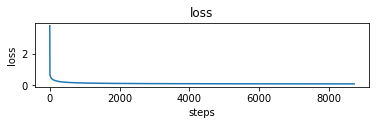

In [85]:
#画出损失函数变化的图
fig = plt.figure()
ax = fig.add_subplot(312)#三个数字分别代表行、列及本图所处位置
#ax.axis([-5,5,0,1])#设置x轴最小、最大值，y轴最小、最大值；
#ax.scatter(xcord1,ycord1, s=30, c='red', marker='s')  #用于画散点图；
#ax.plot(x, y)#用于画线图；
ax.plot(loss)#用于画线图；
plt.title("loss")#图形添加标题；
plt.xlabel('steps')
plt.ylabel('loss')#分别对坐标轴添加标题
plt.show()#显示图形；

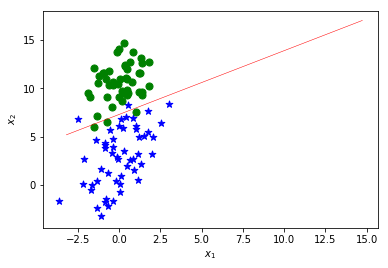

In [91]:
# 用pylab绘制决策边界
for i in range(X.shape[0]):                                    #绘制样本点
    x = X[i]
    if y[i] == 1:
        plt.scatter(x[0], x[1], marker='*', color='blue', s=50)         
    else:
        plt.scatter(x[0], x[1], marker='o', color='green', s=50)

hSpots = np.linspace(X[:,1].min(), X[:,1].max(), 100)  #分界线x轴的点
theta1, theta2 = w[-1]
theta0 = b
vSpots = -(theta0+theta1*hSpots)/theta2                #分界线y轴的点
#两个特征的分界线的数学公式：theta0+theta1*x+theta2*y=0 theta0是偏执项
plt.plot(hSpots, vSpots, color='red', linewidth=.5)    #打点-连线，绘制分界线
plt.xlabel(r'$x_1$')                                   #x轴名称
plt.ylabel(r'$x_2$')                                   #y轴名称
plt.show()